## Datetime Index

In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [4]:
#Create an datetime object
my_date = datetime(my_year,my_month,my_day)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [7]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
my_date_time.day #get attribute value from datetime object

2

In [9]:
type(my_date_time)

datetime.datetime

In [10]:
import numpy as np

In [15]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype = 'datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [17]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype = 'datetime64[Y]')
#only keep year precision

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [ ]:
#Produce a series of datetime

In [19]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [20]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]') 
#Speccify the step unit sie the dtype

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [22]:
np.arange('2000','2018',dtype='datetime64[Y]') 

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype='datetime64[Y]')

## Datetime Index Part 2
use with pandas

In [23]:
import pandas as pd

In [24]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')
#Pandas can identify some other string code as datatime formats

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [28]:
pd.to_datetime(['2/1/2018','1/3/2018'])

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [29]:
pd.to_datetime(['2/1/2018','1/3/2018'], format = '%d/%m/%Y') 
#Re-format and customize the datetime

DatetimeIndex(['2018-01-02', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [30]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 1.08325282 -0.81174364]
 [ 0.87774141 -0.56875826]
 [-0.64208138 -1.12137474]]


In [33]:
#Create a dataframe with datetime index
idx = pd.date_range('2020-01-01',periods=3, freq='D')

df = pd.DataFrame(data,index = idx, columns = cols)

In [36]:
df

,A,B
2020-01-01,1.083253,-0.811744
2020-01-02,0.877741,-0.568758
2020-01-03,-0.642081,-1.121375


In [35]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [37]:
df.index.max() #return the most recent date

Timestamp('2020-01-03 00:00:00', freq='D')

In [38]:
df.index.argmax() #return the index of the most recent date

2

## Time Resampling
- Group by based on time frequency

In [1]:
import pandas as pd

In [18]:
df = pd.read_csv(r"C:\Users\rapeng\Desktop\Time Series\UDEMY_TSA_FINAL\Data\starbucks.csv"
                 ,index_col = 'Date',parse_dates = True)
#read date as timestamp and set it as index

In [19]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [20]:
#read date as timestamp and set it as index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [21]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [23]:
#Check our the rules in another notebook
#daily --> yearly
df.resample(rule = 'A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [24]:
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [25]:
df.resample(rule = 'A').std()

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [26]:
def first_day(entry):
    
    #Is there an entry?
    if len(entry) != 0:
        #If so, return first entry
        return entry[0]

In [27]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [28]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


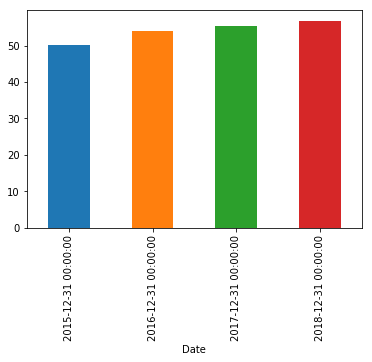

In [34]:
df['Close'].resample('A').mean().plot.bar()
#More example on another notebook

## Time Shifting

In [35]:
#Continue with starbuck dataste
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [36]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [40]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [41]:
df.shift(1).tail() #Lose infomation of the last row

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [42]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [46]:
#Shift by timeseries frequency
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [44]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Rolling and Expanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\rapeng\Desktop\Time Series\UDEMY_TSA_FINAL\Data\starbucks.csv"
                 ,index_col = 'Date',parse_dates = True)

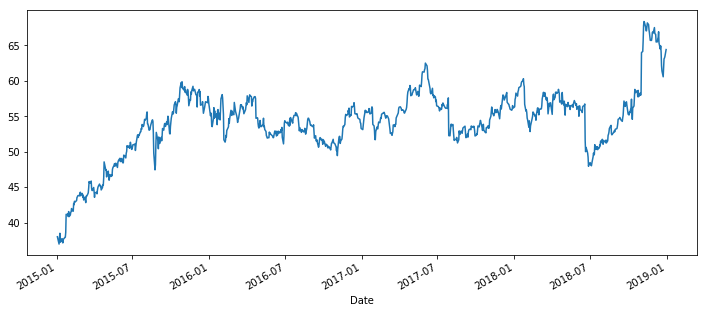

In [5]:
df['Close'].plot(figsize = (12,5))

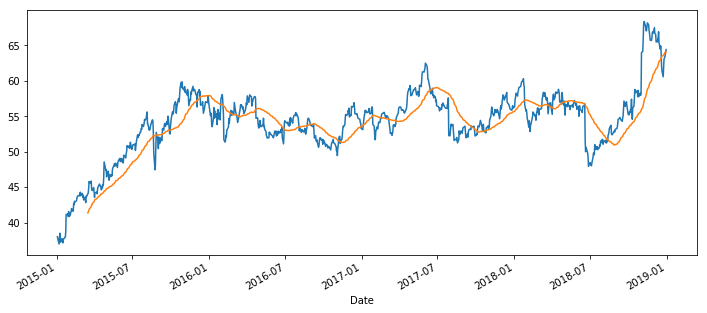

In [11]:
df['Close'].plot(figsize = (12,5))
df.rolling(window = 50).mean()['Close'].plot() #Moving average

In [12]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window = 30).mean()

In [13]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


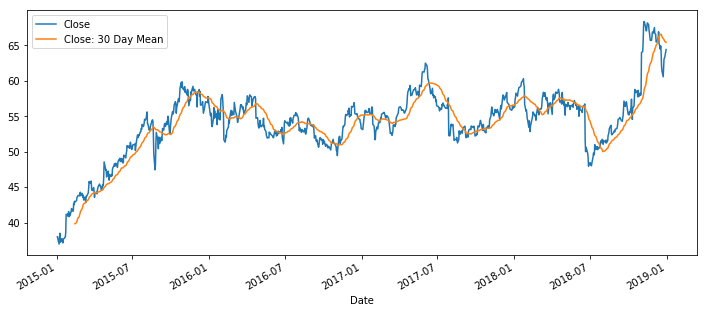

In [14]:
df[['Close','Close: 30 Day Mean']].plot(figsize = (12,5))

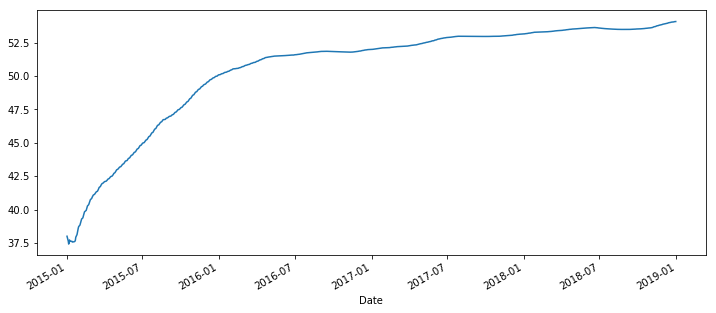

In [15]:
df['Close'].expanding().mean().plot(figsize = (12,5))
#Expanding and calculate mean of every row before a specific row
#The window keeps 'expanding' with you

## Visualize Time Series Data

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rapeng\Desktop\Time Series\UDEMY_TSA_FINAL\Data\starbucks.csv"
                 ,index_col = 'Date',parse_dates = True)

In [2]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [6]:
#If the index is not datetime, turn it into datetime
#df.index = pd.to_datetime(df.index)

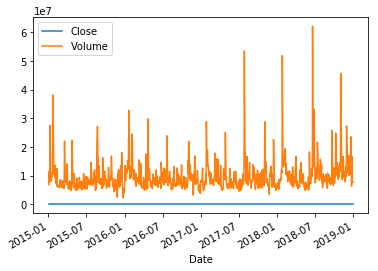

In [7]:
df.plot()

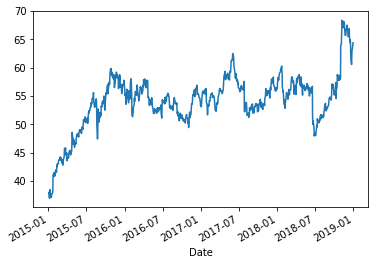

In [8]:
df['Close'].plot()

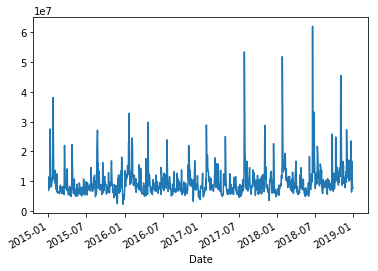

In [9]:
df['Volume'].plot()

In [10]:
title ='TITLE'
ylabel = 'Y LABEL'
xlabel = 'X LABEL'

[Text(0, 0.5, 'Y LABEL'), Text(0.5, 0, 'X LABEL')]

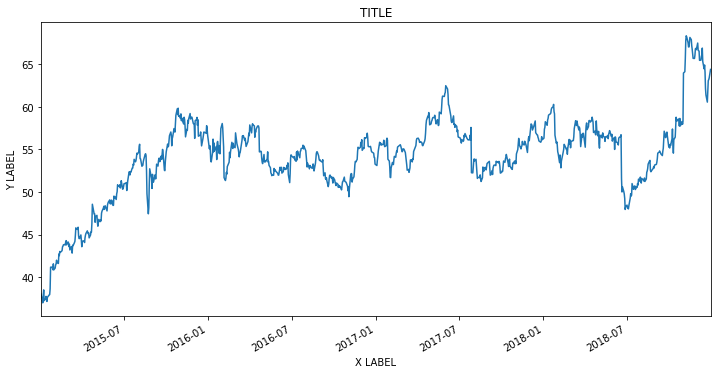

In [14]:
#Do autoscaling and set labels
ax = df['Close'].plot(figsize = (12,6), title = title)
ax.autoscale(axis = 'x',tight = True) #get rid of white space on x axis
ax.set(xlabel = xlabel, ylabel = ylabel)

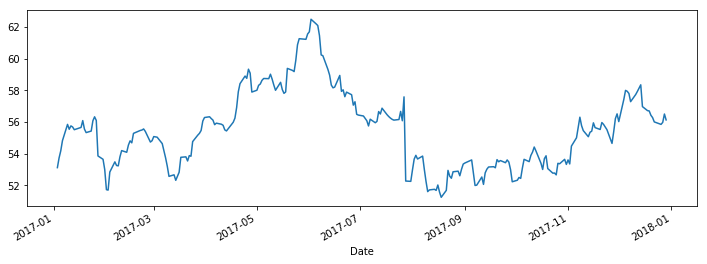

In [18]:
#Time series slice
df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12,4))

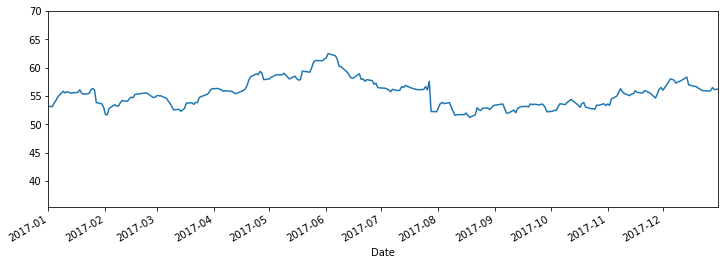

In [21]:
#Select slice within the plot function. The scale will be different
df['Close'].plot(figsize = (12,4),xlim = ['2017-01-01','2017-12-31'])

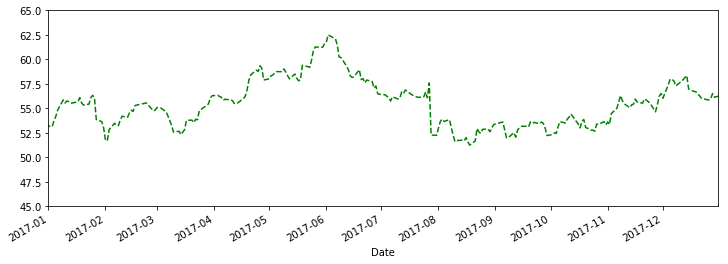

In [26]:
df['Close'].plot(figsize = (12,4),xlim = ['2017-01-01','2017-12-31'],
                ylim = [45,65],ls='--',c='green') 
#scale the y axis and set line style

In [27]:
from matplotlib import dates

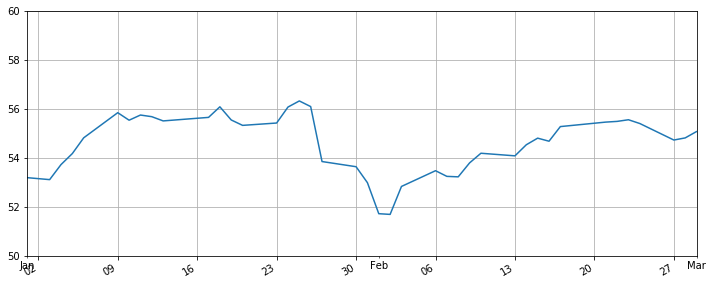

In [38]:
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'],ylim = [50,60],figsize=(12,5))
ax.set(xlabel = '') #remove the x axis label

#The date are one week apart after setting the locator
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0)) 
#format the date with different format to display 
#(check the table in another notebook for details)
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [ ]:
df['Close'].plot(xlim = ['2017-01-01','2017-03-01'])